#Regressão Linear Simples com PCA

##Importar e Instalar Libs

In [239]:
!pip install plotly --upgrade

In [240]:
import pandas as pd #Manipulações com DataFrames
import numpy as np #Manipulações numéricas
import matplotlib.pyplot as plt #Gráficos
import plotly.express as px #Gráficos interativos
import seaborn as sns #Gráficos
import plotly.graph_objects as go #Gráficos interativos

from sklearn import datasets #Utilizar base de dados
from sklearn.preprocessing import StandardScaler #Padronizar os dados (z-score)
from sklearn.model_selection import train_test_split #Separar as bases de dados em treinamento e teste
from sklearn.linear_model import LinearRegression #Algoritmo de Regressão Linear do Sklearn
%matplotlib inline

##Carregar base de dados

In [241]:
dataset=datasets.load_boston()

##Preparação e entendimento dos dados

**Atributos**

* CRIM - taxa de crime per capita por cidade.
* ZN - proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados.
* INDUS - proporção de acres de negócios não varejistas por cidade.
* CHAS - Variável dummy de Charles River (= 1 se a área limita o rio; 0 caso contrário).
* NOX  - concentração de óxidos nítricos (partes por 10 milhões).
* RM  - número médio de quartos por habitação.
* AGE - proporção de unidades ocupadas pelo proprietário construídas antes de 1940.
* DIS - distâncias ponderadas para cinco centros de empregos de Boston.
* RAD - índice de acessibilidade a rodovias radiais.
* TAX - taxa de imposto sobre a propriedade de valor total por $10.000.

* PTRATIO - proporção aluno-professor por cidade.
* B - 1000 (Bk - 0,63) ^ 2 onde Bk é a proporção de negros por cidade.
* LSTAT - % status inferior da população.
* MEDV  - Valor médio das casas ocupadas pelo proprietário em US $ 1.000.

In [242]:
df_boston=pd.DataFrame(dataset.data, columns=dataset.feature_names)
df_boston['MEDV']=np.array([dataset.target]).T

In [243]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


##Análise dos Dados

###Verificar valores nulos na base

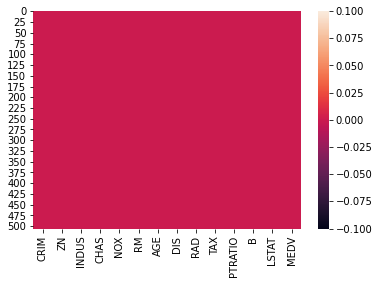

In [244]:
sns.heatmap(df_boston.isnull());

###Matriz de Correlações

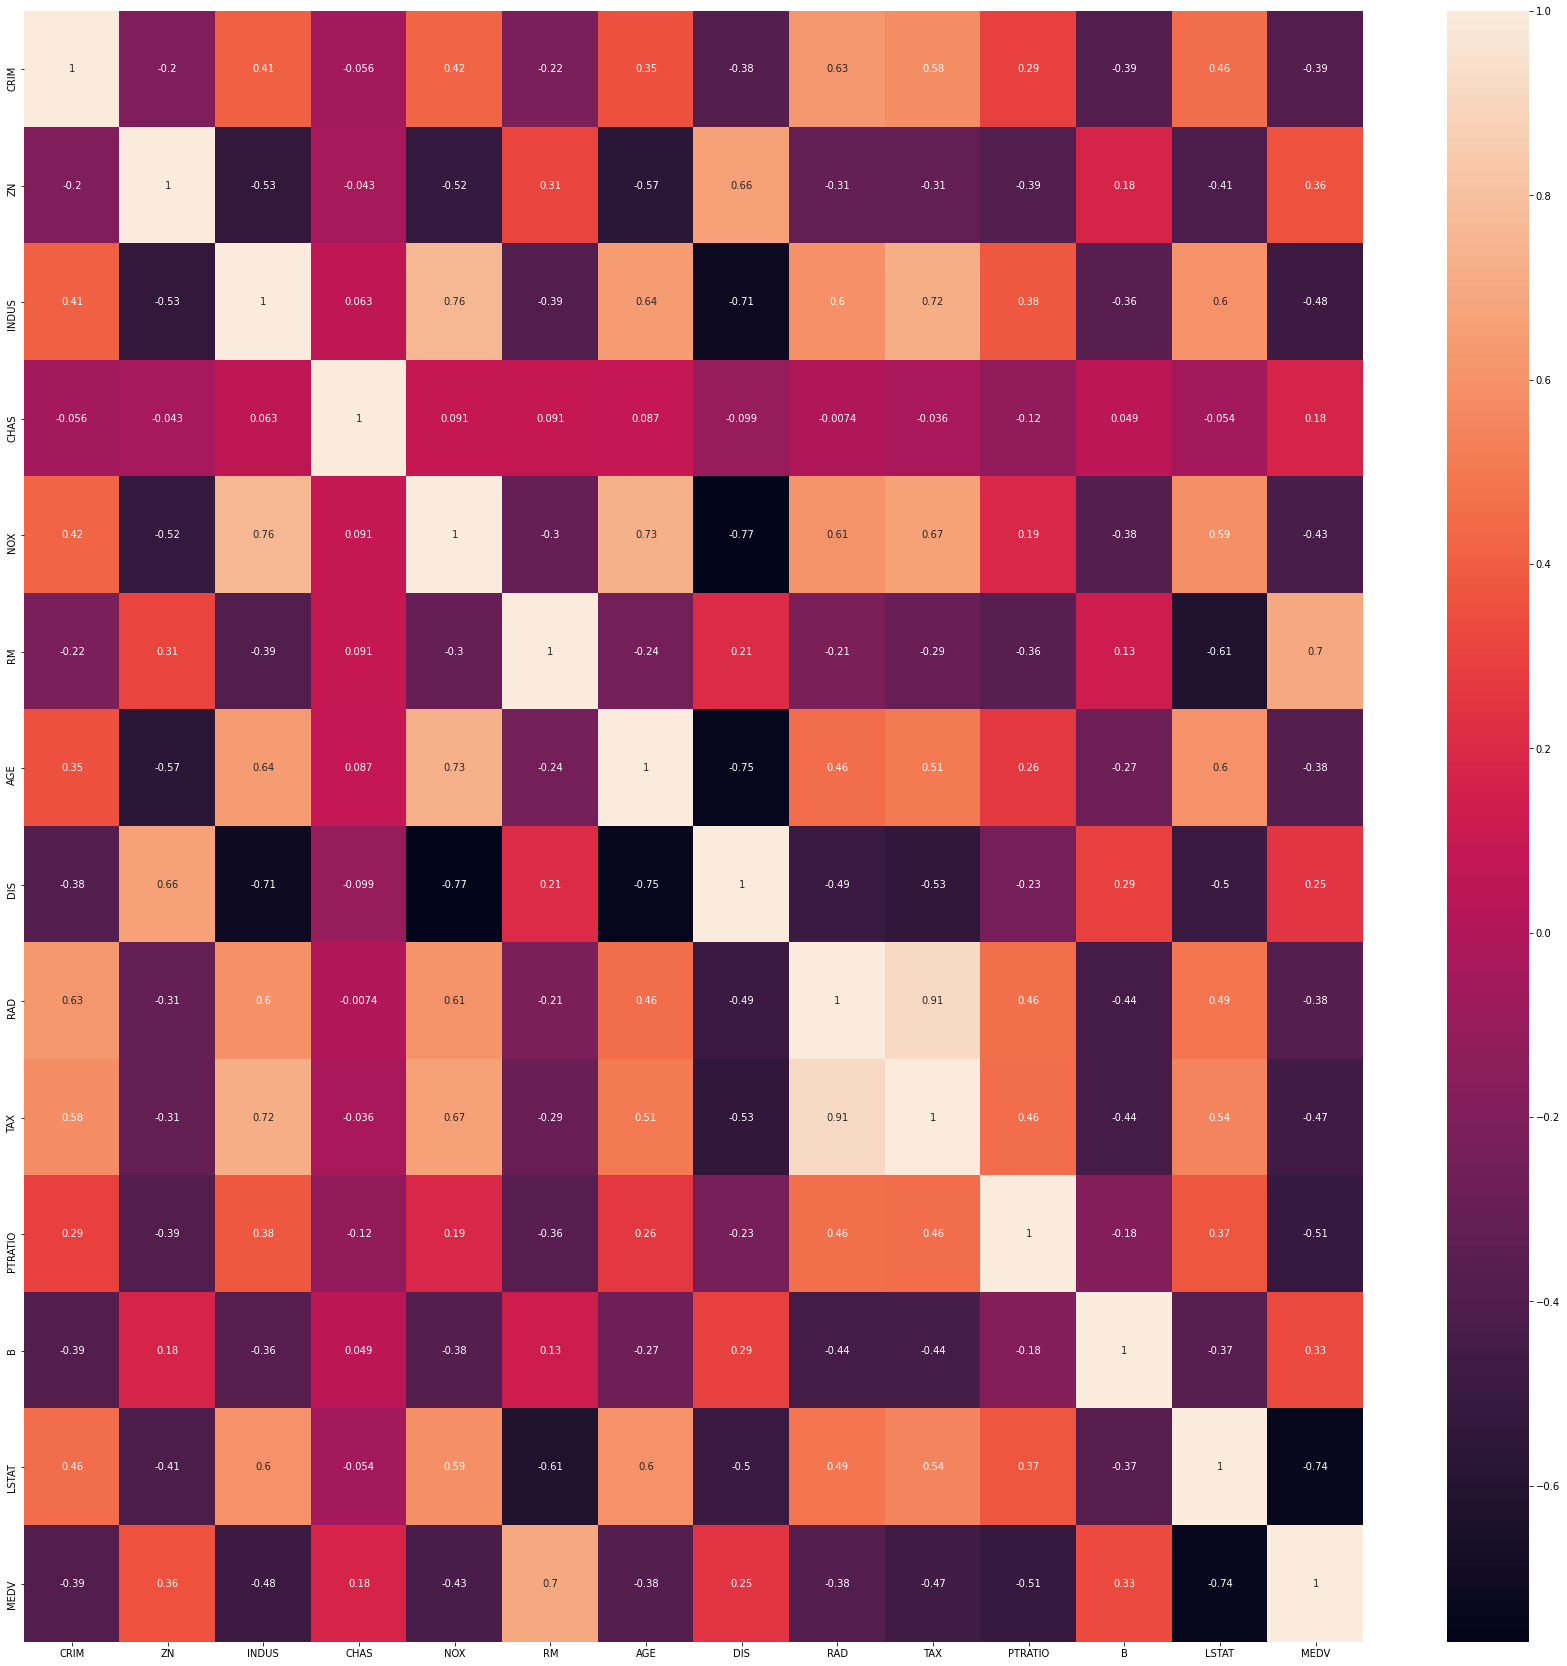

In [245]:
figura=plt.figure(figsize=(30,30))
sns.heatmap(df_boston.corr(),annot=True);

##PCA

###Correlação

In [283]:
df_boston_cov=df_boston.drop('CHAS',axis=1)

In [287]:
cov=df_boston_cov.iloc[:,0:12].corr()
cov

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044


###Autovalores e Autovetores ordenados

In [288]:
def sortear_eig(A):  # Por enquanto, classificamos 'por convenção'. Para o PCA, a classificação é fundamental.
    lambdas, vs = np.linalg.eig(A)
    #A próxima linha apenas classifica valores e vetores juntos em ordem decrescente de autovalores
    lambdas, vs = zip(*sorted(zip(list(lambdas), list(vs.T)),key=lambda x: x[0], reverse=True))
    return lambdas, np.array(vs).T  #desfazendo o cast da lista da linha anterior

lambdas, vs = sortear_eig(cov)

###Verificando componentes que atendam o Critério de Kaiser (Capturem mais de 1 de uma variável)

In [289]:
for i in range(1,len(lambdas)+1):
  if lambdas[i-1] > 1:
    print(f'PCA{i} {lambdas[i-1]}')

PCA1 6.1267187961514775
PCA2 1.342479287575694
PCA3 1.1797848331200622


###Calculando Scores Fatorias

In [290]:
scoresFatorias=((vs)/np.sqrt(lambdas)).T

In [291]:
scores=pd.DataFrame({'PCA1':scoresFatorias[0]})
scores

,PCA1
0,-0.101413
1,0.103537
2,-0.140038
3,-0.138482
4,0.076496
5,-0.126693
6,0.129868
7,-0.129208
8,-0.136763
9,-0.082851


###Padronizar os dados

In [294]:
scaler=StandardScaler()
data_scaler=scaler.fit_transform(df_boston_cov.iloc[:,0:12])

###Distribuir os scores entre as variáveis padronizadas

In [295]:
F1=pd.DataFrame([x*scores['PCA1'] for x in data_scaler])

###Criação de fatores 

In [296]:
F1['fator1']=F1.sum(axis=1)

In [349]:
data=pd.DataFrame({'fator1': F1.reset_index()['fator1'], 'MEDV': df_boston['MEDV']})

##Regressão Linear Simples

###Separação de atributos X e Y

In [346]:
X=data.iloc[:,0:1].values
Y=data.iloc[:,1].values

###Criação do algoritmo Manual

In [337]:
class ManualLinearRegression():
    def __init__(self, X, y, alpha=0.03, n_iter=1500):

        self.alpha = alpha
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X, 1)
        self.X = np.hstack((np.ones(
            (self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        self.y = y[:, np.newaxis]
        self.params = np.zeros((self.n_features + 1, 1))
        self.coef_ = None
        self.intercept_ = None

    def fit(self):

        for i in range(self.n_iter):
            self.params = self.params - (self.alpha/self.n_samples) * \
            self.X.T @ (self.X @ self.params - self.y)

        self.intercept_ = self.params[0]
        self.coef_ = self.params[1:]

        return self

    def score(self, X=None, y=None):

        if X is None:
            X = self.X
        else:
            n_samples = np.size(X, 0)
            X = np.hstack((np.ones(
                (n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))

        if y is None:
            y = self.y
        else:
            y = y[:, np.newaxis]

        y_pred = X @ self.params
        score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())

        return score

    def predict(self, X):
        n_samples = np.size(X, 0)
        y = np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) \
                            / np.std(X, 0))) @ self.params
        return y

    def get_params(self):

        return self.params

###Separar base de dados em treinamento e teste

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

print(f'Treinamento: X: {X_train.shape} Y:{y_train.shape}')
print(f'Teste: X: {X_test.shape} Y: {y_test.shape}')

Treinamento: X: (379, 1) Y:(379,)
Teste: X: (127, 1) Y: (127,)


###Treinamento dos modelos

In [339]:
modelo_manual = ManualLinearRegression(X_train, y_train).fit()
modelo_sklearn = LinearRegression().fit(X_train, y_train)

Acurácia treinamento

In [340]:
acuracia_train_manual = modelo_manual.score()
acuracia_train_sklearn = modelo_sklearn.score(X_train, y_train)

Acurácia teste

In [341]:
acuracia_test_manual = modelo_manual.score(X_test, y_test)
acuracia_test_sklearn = modelo_sklearn.score(X_test, y_test)

Previsões

In [342]:
previsoes_manual = modelo_manual.predict(X_test)
previsoes_sklearn = modelo_sklearn.predict(X_test)

Visualização das métricas e geral

In [343]:
pd.DataFrame([[acuracia_train_manual, acuracia_train_sklearn],[acuracia_test_manual, acuracia_test_sklearn]],
             ['Acurácia do Treinamento', 'Acurácia do Teste'],    
             ['Nossa Implementação', 'Implementação do Sklearn'])

,Nossa Implementação,Implementação do Sklearn
Acurácia do Treinamento,0.428500,0.428500
Acurácia do Teste,0.197078,0.197917


###Plotagem dos gráficos

Gráfico com a comparação dos resultados esperados com as previsões manuais

In [344]:
grafico1=px.scatter(x=X_test.ravel(),y=y_test)
grafico2=px.line(x=X_test.ravel(),y=previsoes_manual.ravel())
grafico2.data[0].line.color='red'
grafico3=go.Figure(data=grafico1.data+grafico2.data)
grafico3

Gráfico com a comparação dos resultados esperados com as previsões Sklearn

In [345]:
grafico1=px.scatter(x=X_test.ravel(),y=y_test)
grafico2=px.line(x=X_test.ravel(),y=previsoes_sklearn)
grafico2.data[0].line.color='red'
grafico3=go.Figure(data=grafico1.data+grafico2.data)
grafico3